### Time Resolved Photoluminescence Modeling

In a TRPL experiment the sample is hitted by a laser pulse of a very short time (picoseconds) which generates a first excess carrier density *n(0)*. This value decays in time due to charge recombination processes happening in the material.
The overall decay of the excess carrier density results in a exponential decay curve that is normally fitted with a multiple exponential. But the main limitation is that lifetime constants are extrapoleted by these fitting curve which do not explain precisely the physical processes which play simultaneously a role in the decay dynamics. 

For these reasons, we want to analyze in details the processes of generation and recombination of charges that happen after excitation to find the best and most precise way to get information on carrier recombination processes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import skewnorm
from scipy.stats import exponnorm
# the file function.py has all the exponential fit used here
from functions import *
from scipy.stats import norm
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
"""Recycle params for plotting"""
plt.rc('xtick', labelsize = 30)
plt.rc('xtick.major', pad = 3)
plt.rc('ytick', labelsize = 30)
plt.rc('lines', lw = 3.5, markersize = 20.5)
plt.rc('legend', fontsize = 30)
plt.rc('axes', linewidth = 3.5)

In [3]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

## High level injection regime equation

In [4]:
# HLI continuity equation: dn/dt with k2, n0 as a constant and k1 as a variable
def photoluminescence_HLI(t, k1):
    def model(n, t):
        k2 = 9.98e-10 # literature value for FACs composition
        dndt = -(k2*(n**2) + k1*n)
        return dndt
    n0 = np.tile(np.power(10, 18), 1000) #the number 1000 can be changed depending on hopw many decay you want to simulate. If you want to simulate more or less just make sure to change also the number of knr in the code above.
    n = odeint(model, n0, t)
    k2 = 9.98e-10
    pl_HLI = k2 * (n**2)
    return pl_HLI

## Low level injection regime equation

In [5]:
# LLI continuity equation: dn/dt with k2, n0 as a constant and k1 as a variable
def photoluminescence_LLI(t, k1):
    def model(n, t):
        k2 = 9.98e-10
        dndt = -(k2*(n**2) + k1*n)
        return dndt
    n0 = np.tile(np.power(10, 13), 1000)
    n = odeint(model, n0, t)
    k2 = 9.98e-10
    p0 = 1e14
    pl_LLI = k2 * n* p0
    return pl_LLI

In [6]:
#function to calulate the index of the PL/e values in the "pl" database by looking at the nearest neighbor of the "PL_e_values" inside "pl"
def find_idx(array, value):
    return (np.abs(array - value)).argmin()

## 1) Simulation of PL decays in HLI with a *linear distribution* of K_nonrad from 10^5 to 10^7 cm-3 

In [7]:
# photoluminescence database from k1 from 1e5 to 1e7 and time from 0 to 1000ns
t = np.linspace(0,5000, 10000)*1e-9
pl_HLI = photoluminescence_HLI(t = np.linspace(0,5000, 1000)*1e-9, k1= np.logspace(5, 8, 1000))
pl_HLI

array([[2.20561486e+09, 2.20561486e+09, 2.20561486e+09, ...,
        2.20561486e+09, 2.20561486e+09, 2.20561486e+09],
       [2.20340818e+09, 2.20339287e+09, 2.20337746e+09, ...,
        8.21809455e+08, 8.16199146e+08, 8.10588610e+08],
       [2.20120370e+09, 2.20117312e+09, 2.20114233e+09, ...,
        3.06205202e+08, 3.02038684e+08, 2.97900540e+08],
       ...,
       [8.13035893e+08, 8.07425265e+08, 8.01814827e+08, ...,
        8.44524461e-29, 5.93588971e-27, 3.04606360e-26],
       [8.12222458e+08, 8.06611840e+08, 8.01001453e+08, ...,
        2.13691295e-28, 1.55100781e-26, 8.15735254e-26],
       [8.11409837e+08, 8.05799235e+08, 8.00188904e+08, ...,
        4.10016398e-28, 3.08761594e-26, 1.66959366e-25]])

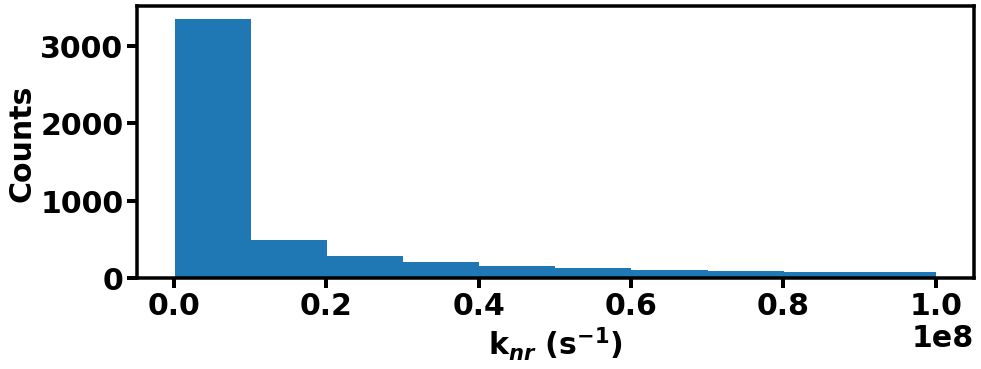

In [8]:
k1= np.logspace(5, 8, 5000)
plt.figure(figsize=(15,5))
plt.tick_params(length=8)
plt.hist(k1)
plt.xlabel("k$_{nr}$ (s$^{-1}$)", fontsize =30, fontweight ='bold')
#plt.yscale("log")
#plt.xlim(-100000, 2500000)
plt.ylabel('Counts', fontsize =30, fontweight ='bold')
plt.ticklabel_format(axis='y', style='plain')
plt.tick_params(direction='out', length=10, width=4)


In [9]:
#x values of time
t = np.linspace(0,5000, 1000)*1e-9
t

array([0.00000000e+00, 5.00500501e-09, 1.00100100e-08, 1.50150150e-08,
       2.00200200e-08, 2.50250250e-08, 3.00300300e-08, 3.50350350e-08,
       4.00400400e-08, 4.50450450e-08, 5.00500501e-08, 5.50550551e-08,
       6.00600601e-08, 6.50650651e-08, 7.00700701e-08, 7.50750751e-08,
       8.00800801e-08, 8.50850851e-08, 9.00900901e-08, 9.50950951e-08,
       1.00100100e-07, 1.05105105e-07, 1.10110110e-07, 1.15115115e-07,
       1.20120120e-07, 1.25125125e-07, 1.30130130e-07, 1.35135135e-07,
       1.40140140e-07, 1.45145145e-07, 1.50150150e-07, 1.55155155e-07,
       1.60160160e-07, 1.65165165e-07, 1.70170170e-07, 1.75175175e-07,
       1.80180180e-07, 1.85185185e-07, 1.90190190e-07, 1.95195195e-07,
       2.00200200e-07, 2.05205205e-07, 2.10210210e-07, 2.15215215e-07,
       2.20220220e-07, 2.25225225e-07, 2.30230230e-07, 2.35235235e-07,
       2.40240240e-07, 2.45245245e-07, 2.50250250e-07, 2.55255255e-07,
       2.60260260e-07, 2.65265265e-07, 2.70270270e-07, 2.75275275e-07,
      

In [10]:
#weighted sum of photoluminescence data
pl_HLI_sum = pl_HLI.sum(axis=0)
pl_HLI_sum.size

1000

In [11]:
#weighted average og the photoluminescence data
pl_HLI_avg = np.average(pl_HLI, weights=pl_HLI_sum, axis=-1)
pl_HLI_avg.size

1000

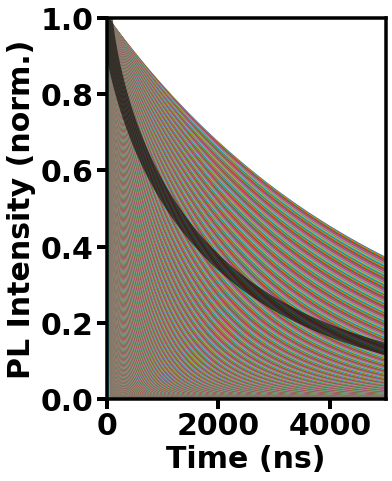

In [12]:
#plot of exponential decay of photoluminescence
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_HLI/np.max(pl_HLI))
plt.plot(t*1e9, pl_HLI_avg/np.max(pl_HLI_avg),'-',color= 'black', lw = 12, alpha=0.6, label="Average")
plt.xlabel('Time (ns)', fontsize=30, fontweight='bold')
plt.ylabel('PL Intensity (norm.)', fontsize= 30, fontweight='bold')
plt.tick_params(direction='out', length=10, width=4)
plt.xlim(0, 5000)
plt.ylim(0,1)
plt.show()

In [13]:
#streched exponential fitting of the average PL exponential decay
stretched_exp = stretch_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 1916.0701001645389
Beta = 0.7437994779808665
avg. tau (ns) = 2297.1478403681604


C:\Users\Margherita\Carrier_recombination\functions.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  return a * np.exp(-((1.0 / tc) * t) ** beta)
C:\Users\Margherita\Carrier_recombination\functions.py:24: RuntimeWarning: invalid value encountered in multiply
  return a * np.exp(-((1.0 / tc) * t) ** beta)
C:\Users\Margherita\Carrier_recombination\functions.py:39: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [14]:
#double exponential fitting of the average PL exponential decay
double_exp = double_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 621.9088749063269
a1 = 0.29547363353792017
tau2 (ns) = 3023.328041504343
a2 = 0.6714397762840301
avg. tau (ns) = 2289.4918576282926


C:\Users\Margherita\Carrier_recombination\functions.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)))
C:\Users\Margherita\Carrier_recombination\functions.py:62: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)))
C:\Users\Margherita\Carrier_recombination\functions.py:82: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


In [15]:
#single exponential fitting of the average PL exponential decay
single_exp = single_exp_fit(pl_HLI_avg/np.max(pl_HLI_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 2503.221543254343
a = 0.8450559555837311
avg. tau (ns) = 2503.221543254343


C:\Users\Margherita\Carrier_recombination\functions.py:107: RuntimeWarning: divide by zero encountered in double_scalars
  return (a * np.exp(-((1.0 / tau)*t)))
C:\Users\Margherita\Carrier_recombination\functions.py:107: RuntimeWarning: invalid value encountered in multiply
  return (a * np.exp(-((1.0 / tau)*t)))
C:\Users\Margherita\Carrier_recombination\functions.py:121: RuntimeWarning: divide by zero encountered in true_divide
  Resid= (np.sum(((PL_sim-TRPL)**2)/(np.sqrt(PL_sim)**2)))


(0.1, 1.2)

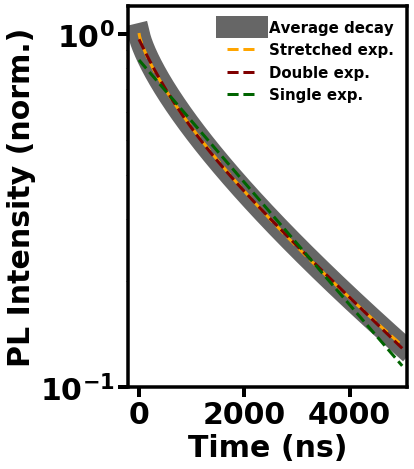

In [16]:
# plot fitting functions of the average PL exponential decay
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_HLI_avg/np.max(pl_HLI_avg),'-',color= 'black', lw = 22, alpha=0.6, label="Average decay")
plt.plot(t*1e9, stretched_exp[4], '--',color='orange', lw =3, label="Stretched exp.")
plt.plot(t*1e9, double_exp[5], '--',color='maroon', lw =3, label="Double exp.")
#plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], '--',color='darkgreen', lw = 3, label="Single exp.")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30, fontweight ='bold')
plt.ylabel("PL Intensity (norm.)", fontsize=30, fontweight ='bold')
plt.tick_params(direction='out', length=10, width=4)
plt.legend(fontsize=15, frameon=False)
plt.xlim(-200, 5100)
plt.ylim(0.1, 1.2)




### Calculation of theoretical tau  
$I = I_0e^{(\frac{-t}{\tau})}$ when t = $\tau$ and $I = \frac{I_0}{e}$

In [17]:
PL_e_HLI = np.max(pl_HLI, axis=0)/np.e
PL_e_HLI.size

1000

In [18]:
#function to calulate the index of the PL/e values in the "pl" database by looking at the nearest neighbor of the "PL_e_values" inside "pl"
def find_idx(array, value):
    return (np.abs(array - value)).argmin()

In [19]:
# index of PL data calculated considering each array inside the array of pl singularly
time_PL_HLI = np.array([])
for ix, i in enumerate(PL_e_HLI):
    b = find_idx(pl_HLI[:, ix], i)
    time_PL_HLI = np.append(time_PL_HLI, b)

In [20]:
# array of lifetime at which PL=PL0/e
lifetime_HLI = np.array([])
for i in time_PL_HLI:
    lifetime_HLI = np.append(lifetime_HLI, t[int(i)]) 

In [21]:
avg_lifetime_HLI = np.average(lifetime_HLI, weights=pl_HLI_sum, axis=-1)
avg_lifetime_HLI*1e9

2295.083114846842

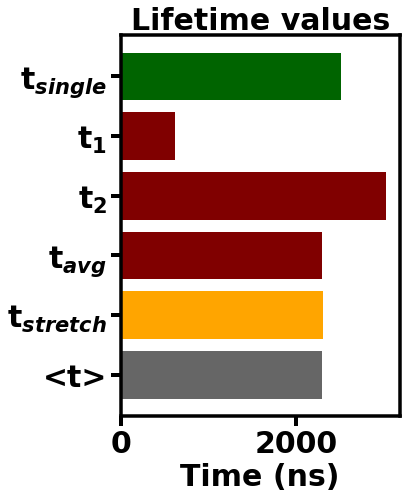

In [22]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure(figsize=(5,7))
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("<t>", avg_lifetime_HLI*1e9, color='black', alpha=0.6)
plt.barh("t$_{stretch}$", stretched_exp[3]*1e9, color = 'orange')
plt.barh("t$_{avg}$", double_exp[4]*1e9, color = 'maroon')
plt.barh("t$_{2}$", double_exp[2]*1e9, color='maroon')
plt.barh("t$_{1}$", double_exp[0]*1e9, color='maroon')
plt.barh("t$_{single}$", single_exp[2]*1e9, color= 'darkgreen')
plt.xlabel("Time (ns)", fontsize =30 , fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tick_params(direction='out', length=10, width=4)

In [23]:
surf_lifetime_avg = calculate_surface_lifetime(avg_lifetime_HLI*1e9)
SRV_avg = calculate_srv (surf_lifetime_avg)
print("SRV1=0 theoretical value = " +str(SRV_avg[0]) +' cm/s')
print("SRV1=SRV2 theoretical value = " +str(SRV_avg[1]) +' cm/s' )

surf_lifetime_stretch = calculate_surface_lifetime(stretched_exp[3]*1e9)
SRV_avg_stretch = calculate_srv (surf_lifetime_stretch)
print("SRV1=0 from stretched exp fitting = " +str(SRV_avg_stretch[0]) +' cm/s')
print("SRV1=SRV2 from stretched exp fitting = " +str(SRV_avg_stretch[1]) +' cm/s' )

surf_lifetime_tau_2 = calculate_surface_lifetime(double_exp[2]*1e9)
SRV_avg_tau2 = calculate_srv (surf_lifetime_tau_2)
print("SRV1=0 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[0]) +' cm/s')
print("SRV1=SRV2 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[1]) +' cm/s' )

surf_lifetime_bi = calculate_surface_lifetime(double_exp[4]*1e9)
SRV_avg_bi = calculate_srv (surf_lifetime_bi)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_bi[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_bi[1]) +' cm/s' )

surf_lifetime_mono = calculate_surface_lifetime(single_exp[2]*1e9)
SRV_avg_mono = calculate_srv (surf_lifetime_mono)
print("SRV1=0 from tau avg mono exp. fitting = " +str(SRV_avg_mono[0]) +' cm/s')
print("SRV1=SRV2 from tau avg mono exp. fitting = " +str(SRV_avg_mono[1]) +' cm/s' )

SRV1=0 theoretical value = 12.43134573649255 cm/s
SRV1=SRV2 theoretical value = 6.214629176243038 cm/s
SRV1=0 from stretched exp fitting = 12.41567356034109 cm/s
SRV1=SRV2 from stretched exp fitting = 6.2067957178495465 cm/s
SRV1=0 from tau 2 of biexp fitting = 8.231673511254032 cm/s
SRV1=SRV2 from tau 2 of biexp fitting = 4.115379101928983 cm/s
SRV1=0 from tau avg biexp fitting = 12.47392780448562 cm/s
SRV1=SRV2 from tau avg biexp fitting = 6.235913048517221 cm/s
SRV1=0 from tau avg mono exp. fitting = 10.981580466019516 cm/s
SRV1=SRV2 from tau avg mono exp. fitting = 5.489975764558069 cm/s


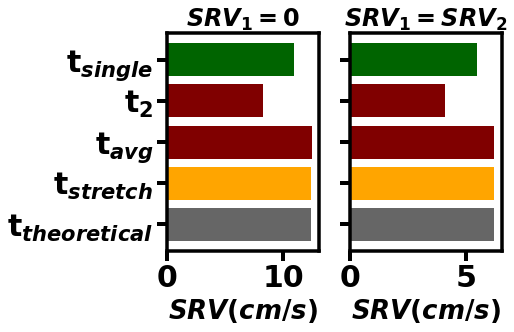

In [24]:

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.barh("t$_{theoretical}$", SRV_avg[0], color='black', alpha=0.6)
ax1.barh("t$_{stretch}$", SRV_avg_stretch[0], color='orange')
ax1.barh("t$_{avg}$", SRV_avg_bi[0],color='maroon')
ax1.barh("t$_{2}$", SRV_avg_tau2[0], color='maroon')
ax1.barh("t$_{single}$", SRV_avg_mono[0], color='darkgreen')
ax1.set_title("$SRV_{1} = 0$", fontsize= 24)
ax1.set_xlabel("$SRV (cm/s)$", fontsize= 26,fontweight='bold')
ax1.tick_params(direction='out', length=10, width=4)

ax2.barh("t$_{theoretical}$",SRV_avg[1], color='black', alpha=0.6)
ax2.barh("t$_{stretch}$", SRV_avg_stretch[1], color='orange')
ax2.barh("t$_{avg}$", SRV_avg_bi[1], color='maroon')
ax2.barh("t$_{2}$",SRV_avg_tau2[1], color='maroon')
ax2.barh("t$_{single}$", SRV_avg_mono[1], color='darkgreen')
ax2.set_title("$SRV_{1} = SRV_{2}$", fontsize= 24)
ax2.set_xlabel("$SRV (cm/s)$", fontsize=26)

ax2.tick_params(direction='out', length=10, width=4)


## 2) Simulation of PL decays in LLI with a *linear distribution* of K_nonrad from 10^6 to 10^8 cm-3 

In [25]:
#creation of LLI PL decay curves and average decay curve
t = np.linspace(0,5000, 1000)*1e-9
# photoluminescence database from k1 from 1e5 to 1e7 and time from 0 to 1000ns
pl_LLI = photoluminescence_LLI(t = np.linspace(0,5000, 1000)*1e-9, k1= np.logspace(5.5, 9, 1000))
pl_LLI

#weighted sum of photoluminescence data
pl_LLI_sum = pl_LLI.sum(axis=0)
pl_LLI_sum

#weighted average og the photoluminescence data
pl_LLI_avg = np.average(pl_LLI, weights=pl_LLI_sum, axis=-1)

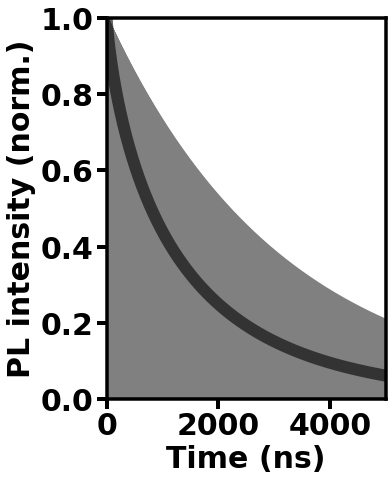

In [26]:
#plot of exponential decay of photoluminescence
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_LLI/np.max(pl_LLI), color='grey')
plt.plot(t*1e9, pl_LLI_avg/np.max(pl_LLI_avg),'-',color= 'black', lw = 12, alpha=0.6,  label="Average")
plt.xlabel('Time (ns)', fontsize =30, fontweight ='bold')
plt.ylabel('PL intensity (norm.)', fontsize= 30, fontweight ='bold')
plt.tick_params(direction='out', length=10, width=4)
plt.xlim(0, 5000)
plt.ylim(0,1)
plt.show()

In [27]:
#streched exponential fitting of the average PL exponential decay
stretched_exp = stretch_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

tau_c (ns) = 1297.9659650074423
Beta = 0.760731206810232
avg. tau (ns) = 1527.695459101342


In [28]:
#double exponential fitting of the average PL exponential decay
double_exp = double_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

tau1 (ns) = 518.0047151549538
a1 = 0.336374739901917
tau2 (ns) = 2129.3795199757024
a2 = 0.6197394822338381
avg. tau (ns) = 1562.4746792075023


In [29]:
#single exponential fitting of the average PL exponential decay
single_exp = single_exp_fit(pl_LLI_avg/np.max(pl_LLI_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau (ns) = 1789.9930316183545
a = 0.816006567091359
avg. tau (ns) = 1789.9930316183545


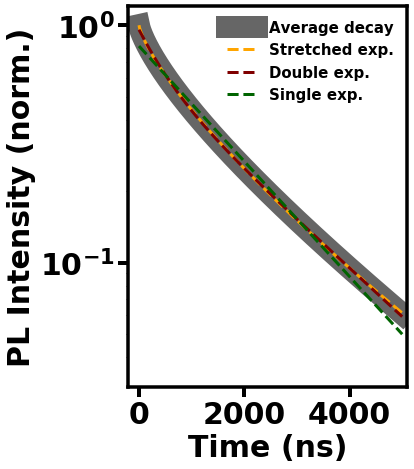

In [30]:
# plot fitting functions of the average PL exponential decay
#plt.figure(figsize=(10,8))
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_LLI_avg/np.max(pl_LLI_avg),'-',color= 'black', lw = 22, alpha=0.6, label="Average decay")
plt.plot(t*1e9, stretched_exp[4], '--', color= 'orange',  lw = 3, label="Stretched exp.")
plt.plot(t*1e9, double_exp[5], '--', color= 'maroon', lw = 3, label="Double exp.")
#plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], '--', color= 'darkgreen', lw = 3, label="Single exp.")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30, fontweight ='bold')
plt.ylabel("PL Intensity (norm.)", fontsize=30, fontweight ='bold')
plt.legend(fontsize=15, frameon=False)
plt.xlim(-200, 5100)
plt.ylim(0.03, 1.2)
plt.tick_params(direction='out', length=10, width=4)

In [31]:
#Mathematical derivation of theoretical average lifetime from weighted average of each time at which I = I0/e

#photoluminescence maximum from LLI regime divided by e
PL_e_LLI = np.max(pl_LLI, axis=0)/np.e
PL_e_LLI.size

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_PL_LLI = np.array([])
for ix, i in enumerate(PL_e_LLI):
    b = find_idx(pl_LLI[:, ix], i)
    time_PL_LLI = np.append(time_PL_LLI, b)
time_PL_LLI

# array of lifetime at which PL=PL0/e at LLI
lifetime_LLI = np.array([])
for i in time_PL_LLI:
    lifetime_LLI = np.append(lifetime_LLI, t[int(i)]) 
lifetime_LLI*1e9

#weighted average of calculate lifetimes with pl_sum weights
avg_lifetime_LLI = np.average(lifetime_LLI, weights=pl_LLI_sum, axis=-1)
avg_lifetime_LLI*1e9

1516.456303118751

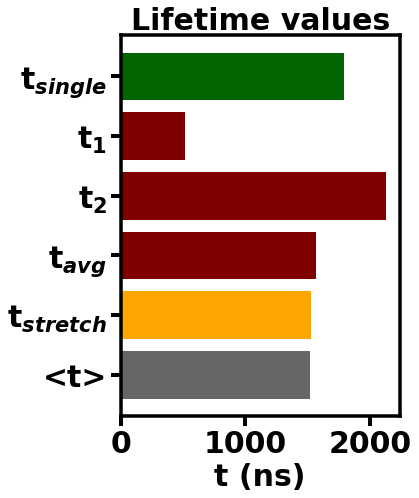

In [32]:

#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure(figsize=(5,7))
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("<t>", avg_lifetime_LLI*1e9, color='black', alpha=0.6)
plt.barh("t$_{stretch}$", stretched_exp[3]*1e9, color = 'orange')
plt.barh("t$_{avg}$", double_exp[4]*1e9, color='maroon')
plt.barh("t$_{2}$", double_exp[2]*1e9, color='maroon')
plt.barh("t$_{1}$", double_exp[0]*1e9, color='maroon')
plt.barh("t$_{single}$", single_exp[2]*1e9, color= 'darkgreen')
plt.xlabel("t (ns)", fontsize =30 , fontweight='bold')
plt.tick_params(direction='out', length=10, width=4)
#plt.xlim(0, 1000)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp[6]*1e9)

SRV1=0 theoretical value = 21.385519679378532 cm/s
SRV1=SRV2 theoretical value = 10.689671513535167 cm/s
SRV1=0 from stretched exp fitting = 21.191314857961785 cm/s
SRV1=SRV2 from stretched exp fitting = 10.592624931210063 cm/s
SRV1=0 from tau 2 of biexp fitting = 13.78823847173813 cm/s
SRV1=SRV2 from tau 2 of biexp fitting = 6.892835293063053 cm/s
SRV1=0 from tau avg biexp fitting = 20.608061858245915 cm/s
SRV1=SRV2 from tau avg biexp fitting = 10.301163039705347 cm/s
SRV1=0 from tau avg biexp fitting = 17.351877402078042 cm/s
SRV1=SRV2 from tau avg biexp fitting = 8.673905407206002 cm/s


Text(0.5, 0, '$SRV (cm/s)$')

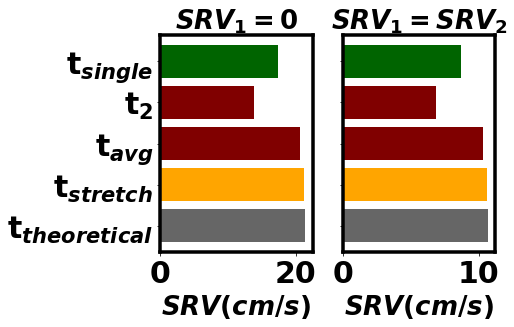

In [33]:


surf_lifetime_avg = calculate_surface_lifetime(avg_lifetime_LLI*1e9)
SRV_avg = calculate_srv (surf_lifetime_avg)
print("SRV1=0 theoretical value = " +str(SRV_avg[0]) +' cm/s')
print("SRV1=SRV2 theoretical value = " +str(SRV_avg[1]) +' cm/s' )

surf_lifetime_stretch = calculate_surface_lifetime(stretched_exp[3]*1e9)
SRV_avg_stretch = calculate_srv (surf_lifetime_stretch)
print("SRV1=0 from stretched exp fitting = " +str(SRV_avg_stretch[0]) +' cm/s')
print("SRV1=SRV2 from stretched exp fitting = " +str(SRV_avg_stretch[1]) +' cm/s' )

surf_lifetime_tau_2 = calculate_surface_lifetime(double_exp[2]*1e9)
SRV_avg_tau2 = calculate_srv (surf_lifetime_tau_2)
print("SRV1=0 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[0]) +' cm/s')
print("SRV1=SRV2 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[1]) +' cm/s' )

surf_lifetime_bi = calculate_surface_lifetime(double_exp[4]*1e9)
SRV_avg_bi = calculate_srv (surf_lifetime_bi)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_bi[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_bi[1]) +' cm/s' )

surf_lifetime_mono = calculate_surface_lifetime(single_exp[2]*1e9)
SRV_avg_mono = calculate_srv (surf_lifetime_mono)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_mono[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_mono[1]) +' cm/s' )

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.barh("t$_{theoretical}$", SRV_avg[0], color='black', alpha=0.6)
ax1.barh("t$_{stretch}$", SRV_avg_stretch[0], color='orange')
ax1.barh("t$_{avg}$", SRV_avg_bi[0], color='maroon')
ax1.barh("t$_{2}$", SRV_avg_tau2[0],color='maroon')
ax1.barh("t$_{single}$", SRV_avg_mono[0], color='darkgreen')
ax1.set_title("$SRV_{1} = 0$", fontsize= 26)
ax1.set_xlabel("$SRV (cm/s)$", fontsize= 26)

ax2.barh("t$_{theoretical}$",SRV_avg[1],color='black', alpha=0.6)
ax2.barh("t$_{stretch}$", SRV_avg_stretch[1], color='orange')
ax2.barh("t$_{avg}$", SRV_avg_bi[1], color='maroon')
ax2.barh("t$_{2}$",SRV_avg_tau2[1], color='maroon')
ax2.barh("t$_{single}$", SRV_avg_mono[1], color='darkgreen')
ax2.set_title("$SRV_{1} = SRV_{2}$", fontsize= 26)
ax2.set_xlabel("$SRV (cm/s)$", fontsize=26)

## Skew-Normal Distribution of k1 with a = 10


The Skew-Normal distribution is an extension of the normal (Gaussian) probability distribution, allowing for the presence of skewness.
The component $\alpha$ is what gives the distribution its "skewness" which regulates the shape of the density function. 

* when $\alpha=0$, the skewness vanishes, and we obtain the standard Normal density
* when $\alpha$ increases in absolute value , the skewness of the distribution increases.
* when  $\alpha\to\infty$ the density converges to the so-called half-normal (or folded normal) density function
* when the sign of $\alpha$ changes, the density is reflected on the opposite side of the vertical axis.

<a href="{http://azzalini.stat.unipd.it/SN/Intro/intro.html}">{Ref}</a>

For a random variable $x$ which has a standard skew normal distribution with skewness parameter $\alpha$, its probability density function is given by:


$f(x) = 2 \phi(x) \Phi(\alpha x)$

with :

$\phi(x)={\frac {1}{\sqrt {2\pi }}}\;e^{-x^{2}/2}$
$\qquad \Phi(\alpha x) = \int_{-\infty}^{\alpha x}\phi(t) dt$

Simple continuity equation considering just the radiative (k2) and defect-assisted non-radiative recombination (k1)
* k1 = skewed distribution with maximum at 1e6 ns and a size of 50 data points
* k2 = 2e-10 cm^3 s^-1
* n0 = 1e14
* t = 0 to 1000 ns

In [34]:
import numpy as np

# set the mean and standard deviation
a, mu, sigma = 3, 8e6, 4e6

# calculate the scaling factor for the Gaussian distribution
scaling_factor = 0.5 / (np.sqrt(2 * np.pi) * sigma)

# set the range of the distribution
lower, upper = 1e3, 1e9

# calculate the probabilities at the lower and upper bounds
p_lower = scaling_factor * np.exp(-0.5 * ((lower - mu) / sigma)**2)
p_upper = scaling_factor * np.exp(-0.5 * ((upper - mu) / sigma)**2)

# calculate the total probability of the distribution in the range
total_p = p_upper - p_lower

# generate 2000 random numbers from a Gaussian distribution
# with the specified mean and standard deviation
skew = []
while len(skew) < 1000:
    x = skewnorm.rvs(a, mu, sigma)
    if lower <= x <= upper:
        skew.append(x)

# convert the list to a numpy array and sort it
skew = np.array(skew)
skew = np.sort(skew)

# print the first 10 numbers
print(skew)

[ 5007222.32636764  5731568.4585416   5806311.9903116   5908892.00528453
  5985878.76210789  6208649.96414752  6208897.15243213  6296953.07516554
  6309136.87364     6326587.17061219  6382225.25212088  6393832.77027934
  6406949.54136678  6411724.29544761  6436295.00792946  6474346.70109953
  6484738.68606491  6511205.10083987  6537287.19357213  6595220.3900003
  6657798.8211479   6672916.67481281  6729828.13559421  6730757.28204376
  6747935.03507254  6766367.41820547  6862897.41185667  6864168.29589744
  6884392.2345836   6970194.61962607  6985876.41371023  6997469.47142763
  7003171.437002    7020243.43344785  7061164.76246371  7119239.0834232
  7127077.94457034  7144002.52844808  7150014.25066501  7184646.87957556
  7194652.42944044  7201651.75574541  7287747.27903317  7302271.72153114
  7347597.10613599  7368958.18999265  7389523.27317087  7407732.36531736
  7436024.52690485  7437703.72823992  7442879.6331214   7454153.20096177
  7472979.69621901  7497179.08794575  7506632.7689828

In [35]:
# skewed gaussian distribution of k1 values
skew = np.absolute(skewnorm.rvs(a = 10, loc = 8e6, scale=40e6, size=1000))
skew

array([7.29547914e+06, 3.35415802e+07, 1.46013627e+07, 7.46535462e+07,
       3.70822094e+07, 8.54487302e+07, 3.83583772e+07, 6.01075330e+07,
       8.06488437e+07, 2.09842816e+07, 3.56572370e+07, 1.97251301e+07,
       1.98544330e+07, 3.65138963e+07, 4.94874738e+07, 3.07700801e+07,
       4.29674794e+07, 4.95420701e+07, 5.52976504e+07, 3.84431022e+07,
       5.67351246e+07, 2.03268479e+07, 4.60316702e+07, 1.51252889e+07,
       2.20769734e+07, 5.86795134e+07, 5.14301017e+07, 2.08690054e+06,
       6.61414394e+07, 5.01244965e+07, 1.40747743e+07, 5.73025247e+05,
       3.73653398e+07, 5.11559986e+07, 5.05989154e+07, 3.59497090e+07,
       6.23284109e+05, 2.50801846e+07, 1.39179100e+07, 2.85502234e+07,
       4.27730344e+07, 1.98950916e+07, 2.46247821e+07, 4.36311867e+07,
       2.90459398e+07, 6.30066943e+07, 2.50969693e+07, 3.17287855e+07,
       4.80293384e+07, 3.77828467e+07, 3.57449980e+07, 5.59650162e+07,
       3.34461022e+07, 3.83942563e+07, 3.44018755e+07, 3.47240402e+07,
      

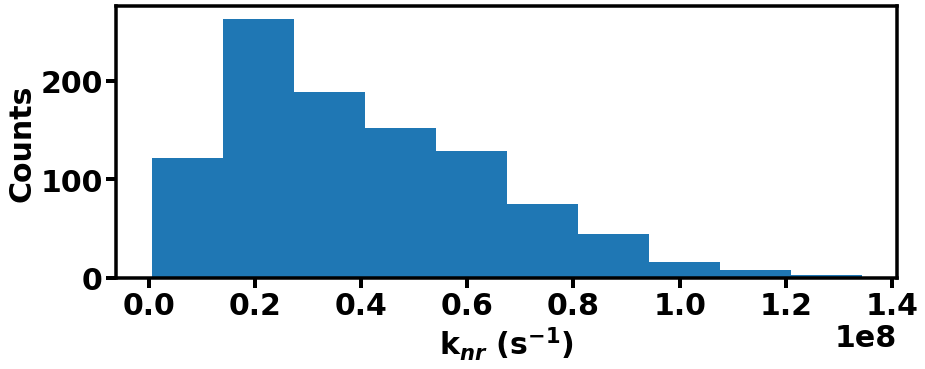

In [36]:
plt.figure(figsize=(14,5))
plt.hist(skew)
plt.xlabel("k$_{nr}$ (s$^{-1}$)", fontsize =30, fontweight ='bold')
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,6))
#plt.yscale("log")
plt.ylabel('Counts', fontsize =30, fontweight ='bold')
plt.tick_params(direction='out', length=10, width=4)

## 1) Simulation of PL decays in HLI with a *skewed distribution* of K_nonrad from 10^6 to 10^7 cm-3 

In [37]:
# PL decay curves for each k1 valu
t=np.linspace(0,5000, 1000)*1e-9
pl_skew = photoluminescence_LLI(k1= skew, t=np.linspace(0,5000, 1000)*1e-9)
pl_skew

# weight of each decay curve
skew_sum = pl_skew.sum(axis=0)
skew_sum.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_skew_avg = np.average(pl_skew, weights=skew_sum, axis=-1)
pl_skew_avg.size

1000

<function matplotlib.pyplot.show(*args, **kw)>

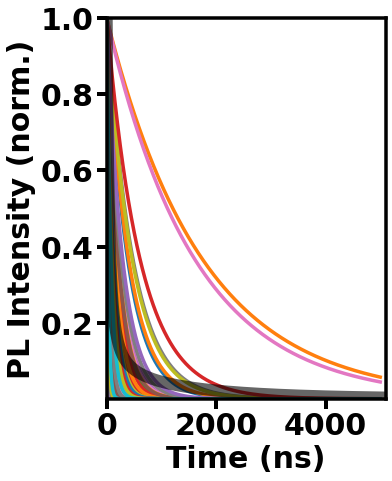

In [38]:
#plot of all exponetial decay for each k1 and average curve
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_skew/np.max(pl_skew))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'-',color= 'black', lw = 12, alpha=0.6, label="Average decay")
plt.xlabel('Time (ns)', fontsize =30, fontweight ='bold')
plt.ylabel('PL Intensity (norm.)', fontsize =30, fontweight ='bold')
plt.tick_params(direction='out', length=10, width=4)
plt.xlim(0, 5100)
plt.ylim(1E-5,1)
#plt.yscale('log')
plt.show

In [39]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

tau_c (ns) = 18.753413685211562
Beta = 0.31353046387808553
avg. tau (ns) = 143.47411049208267


In [40]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

tau1 (ns) = 79.48037901958082
a1 = 0.7226995855947359
tau2 (ns) = 1398.4141115664322
a2 = 0.09890712921515277
avg. tau (ns) = 238.25701358180007


In [41]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

tau (ns) = 887.8857566276556
a = 0.2638765479971182
avg. tau (ns) = 887.8857566276556


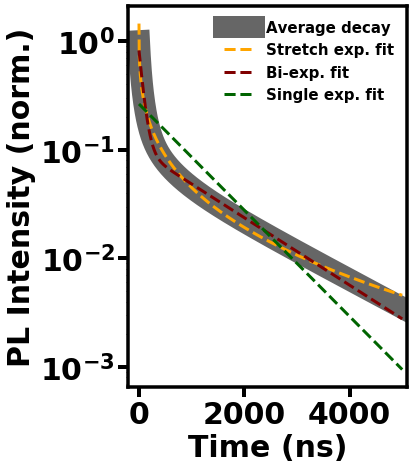

In [43]:
# plot average curve and multiple exponential fitting curves
#plt.figure(figsize=(10,8))
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'-',color= 'black', lw = 22, alpha=0.6, label="Average decay")
plt.plot(t*1e9, stretched_exp_skew[4], '--', color='orange', lw = 3, label="Stretch exp. fit")
plt.plot(t*1e9, double_exp_skew[5], '--', color= 'maroon', lw = 3, label="Bi-exp. fit")
plt.plot(t*1e9, single_exp_skew[3], '--', color= 'darkgreen', lw = 3, label="Single exp. fit")
plt.yscale('log')
plt.xlim(-200, 5100)
#plt.ylim(1e-2, 1)
plt.xlabel("Time (ns)", fontsize =30, fontweight ='bold')
plt.ylabel("PL Intensity (norm.)", fontsize =30, fontweight ='bold')
plt.legend(fontsize=15, frameon=False)
plt.tick_params(direction='out', length=10, width=4)

In [44]:
#Mathematical deriation of lifetime from average curve knowing at $\tau$ : $I = \frac{I_0}{e}$

#photoluminescence maximum divided by e
PL_e_skew = np.max(pl_skew, axis=0)/np.e
PL_e_skew.size

# index of PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[ix, :], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[:, ix], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9


lifetime_skew_avg = np.average(lifetime_skew, weights= skew_sum, axis=-1)
lifetime_skew_avg*1e9

196.7314206655726

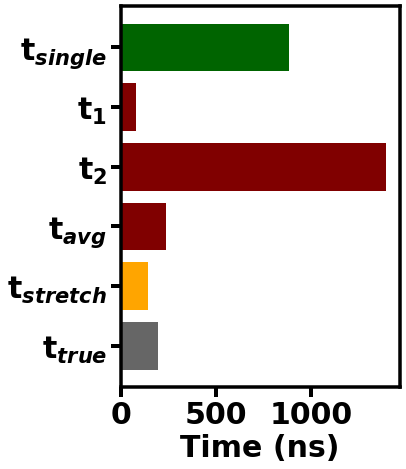

In [45]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure(figsize=(5,7))
#plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("t$_{true}$", lifetime_skew_avg*1e9, color='black', alpha =0.6)
#plt.plot(t*1e9, tau_true, color='grey')
plt.barh("t$_{stretch}$", stretched_exp_skew[3]*1e9, color = 'orange')
plt.barh("t$_{avg}$", double_exp_skew[4]*1e9, color='maroon')
plt.barh("t$_{2}$", double_exp_skew[2]*1e9, color='maroon')
plt.barh("t$_{1}$", double_exp_skew[0]*1e9, color='maroon')
plt.barh("t$_{single}$", single_exp_skew[2]*1e9, color= 'darkgreen')
plt.xlabel("Time (ns)", fontsize =30 , fontweight='bold')
plt.tick_params(direction='out', length=10, width=4)
#plt.xlim(0, 600)
#plt.xlim(0,400, 20)

SRV1=0 theoretical value = 199.03389800758544 cm/s
SRV1=SRV2 theoretical value = 99.25008075325835 cm/s
SRV1=0 from stretched exp fitting = 275.1529405081199 cm/s
SRV1=SRV2 from stretched exp fitting = 137.06696818003414 cm/s
SRV1=0 from tau 2 of biexp fitting = 23.613870199191435 cm/s
SRV1=SRV2 from tau 2 of biexp fitting = 11.803169754235846 cm/s
SRV1=0 from tau avg biexp fitting = 163.3652436578431 cm/s
SRV1=SRV2 from tau avg biexp fitting = 81.50274678973399 cm/s
SRV1=0 from tau avg biexp fitting = 40.07975536222118 cm/s
SRV1=SRV2 from tau avg biexp fitting = 20.0290328190755 cm/s


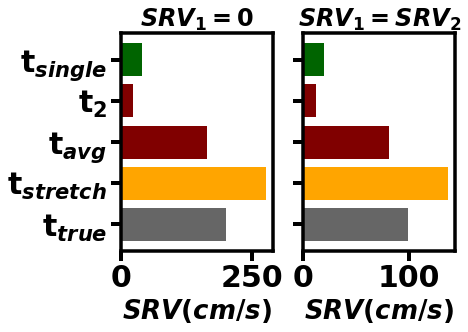

In [46]:
surf_lifetime_avg = calculate_surface_lifetime(lifetime_skew_avg*1e9)
SRV_avg = calculate_srv (surf_lifetime_avg)
print("SRV1=0 theoretical value = " +str(SRV_avg[0]) +' cm/s')
print("SRV1=SRV2 theoretical value = " +str(SRV_avg[1]) +' cm/s' )

surf_lifetime_stretch = calculate_surface_lifetime(stretched_exp_skew[3]*1e9)
SRV_avg_stretch = calculate_srv (surf_lifetime_stretch)
print("SRV1=0 from stretched exp fitting = " +str(SRV_avg_stretch[0]) +' cm/s')
print("SRV1=SRV2 from stretched exp fitting = " +str(SRV_avg_stretch[1]) +' cm/s' )

surf_lifetime_tau_2 = calculate_surface_lifetime(double_exp_skew[2]*1e9)
SRV_avg_tau2 = calculate_srv (surf_lifetime_tau_2)
print("SRV1=0 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[0]) +' cm/s')
print("SRV1=SRV2 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[1]) +' cm/s' )

surf_lifetime_bi = calculate_surface_lifetime(double_exp_skew[4]*1e9)
SRV_avg_bi = calculate_srv (surf_lifetime_bi)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_bi[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_bi[1]) +' cm/s' )

surf_lifetime_mono = calculate_surface_lifetime(single_exp_skew[2]*1e9)
SRV_avg_mono = calculate_srv (surf_lifetime_mono)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_mono[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_mono[1]) +' cm/s' )


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.barh("t$_{true}$", SRV_avg[0], color='black', alpha=0.6)
ax1.barh("t$_{stretch}$", SRV_avg_stretch[0], color='orange')
ax1.barh("t$_{avg}$", SRV_avg_bi[0], color='maroon')
ax1.barh("t$_{2}$", SRV_avg_tau2[0], color='maroon')
ax1.barh("t$_{single}$", SRV_avg_mono[0], color='darkgreen')
ax1.set_title("$SRV_{1} = 0$", fontsize= 24)
ax1.set_xlabel("$SRV (cm/s)$", fontsize= 26)
ax1.tick_params(direction='out', length=10, width=4)

ax2.barh("t$_{true}$",SRV_avg[1], color='black', alpha=0.6)
ax2.barh("t$_{stretch}$", SRV_avg_stretch[1], color='orange')
ax2.barh("t$_{avg}$", SRV_avg_bi[1], color='maroon')
ax2.barh("t$_{2}$",SRV_avg_tau2[1], color='maroon')
ax2.barh("t$_{single}$", SRV_avg_mono[1], color='darkgreen')
ax2.set_title("$SRV_{1} = SRV_{2}$", fontsize= 24)
ax2.set_xlabel("$SRV (cm/s)$", fontsize=26)
ax2.tick_params(direction='out', length=10, width=4)

## 4) Simulation of PL decays in LLI with a *skewed distribution* of K_nonrad

In [54]:
# PL decay curves for each k1 value 
t=np.linspace(0,5000, 1000)*1e-9
pl_skew = photoluminescence_LLI(k1= skew, t=np.linspace(0,5000, 1000)*1e-9)
pl_skew

# weight of each decay curve
skew_sum = pl_skew.sum(axis=0)
skew_sum.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_skew_avg = np.average(pl_skew, weights=skew_sum, axis=-1)
pl_skew_avg.size

1000

(0, 5000)

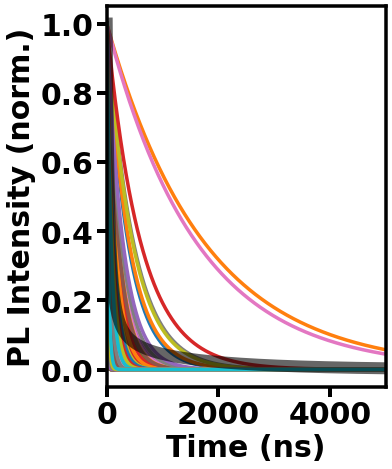

In [56]:
#plot of all exponetial decay for each k1 and average curve
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_skew/np.max(pl_skew))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'-',color= 'black', lw = 12, alpha=0.6,  label="Average")
plt.xlabel('Time (ns)', fontweight ='bold', fontsize =30 )
plt.ylabel('PL Intensity (norm.)', fontweight ='bold', fontsize =30)
plt.tick_params(direction='out', length=10, width=4)
#plt.legend(fontsize=18, frameon=False)
plt.xlim(0,5000)
#plt.yscale('log')
#plt.ylim(0.00001,1)

In [57]:
stretched_exp_skew = stretch_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau_c (ns) = "+str(stretched_exp_skew[0]*1e9))
print("Beta = "+str(stretched_exp_skew[1]))
print("avg. tau (ns) = "+str(stretched_exp_skew[3]*1e9))

tau_c (ns) = 18.04487358643661
Beta = 0.31161651358154435
avg. tau (ns) = 141.64522359664235


In [58]:
double_exp_skew = double_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau1 (ns) = "+str(double_exp_skew[0]*1e9))
print("a1 = "+str(double_exp_skew[1]))
print("tau2 (ns) = "+str(double_exp_skew[2]*1e9))
print("a2 = "+str(double_exp_skew[3]))
print("avg. tau (ns) = "+str(double_exp_skew[4]*1e9))

tau1 (ns) = 79.81687099087979
a1 = 0.7143227237112341
tau2 (ns) = 1391.0095265498408
a2 = 0.09964353935870562
avg. tau (ns) = 240.32951495264663


In [59]:
single_exp_skew = single_exp_fit(pl_skew_avg/np.max(pl_skew_avg), t)
print("tau (ns) = "+str(single_exp_skew[0]*1e9))
print("a = "+str(single_exp_skew[1]))
print("avg. tau (ns) = "+str(single_exp_skew[2]*1e9))

tau (ns) = 893.6934420017332
a = 0.25979650001594845
avg. tau (ns) = 893.6934420017332


(0.0001, 1)

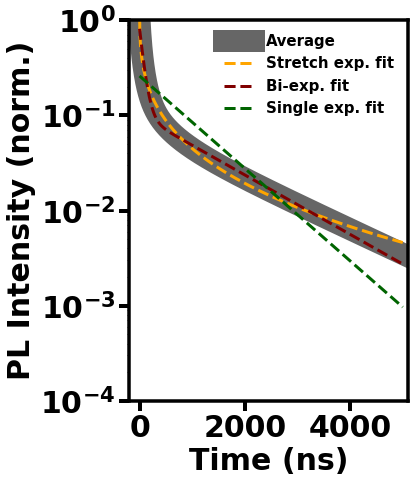

In [60]:
# plot average curve and multiple exponential fitting curves
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_skew_avg/np.max(pl_skew_avg),'-',color= 'black', lw = 22, alpha=0.6,  label="Average")
plt.plot(t*1e9, stretched_exp_skew[4], '--', color='orange', lw = 3, label="Stretch exp. fit")
plt.plot(t*1e9, double_exp_skew[5], '--', color='maroon', lw = 3, label="Bi-exp. fit")
plt.plot(t*1e9, single_exp_skew[3], '--', color='darkgreen', lw = 3, label="Single exp. fit")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize= 30, fontweight ='bold')
plt.ylabel("PL Intensity (norm.)", fontsize= 30, fontweight ='bold')
plt.tick_params(direction='out', length=10, width=4)
plt.legend(fontsize=15, frameon=False)
plt.xlim(-200, 5100)
plt.ylim(0.0001, 1)

In [61]:
#Mathematical deriation of lifetime from average curve knowing at $\tau$ : $I = \frac{I_0}{e}$

#photoluminescence maximum divided by e
PL_e_skew = np.max(pl_skew, axis=0)/np.e
PL_e_skew.size

# index of PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[ix, :], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_skew_PL_e = np.array([])
for ix, i in enumerate(PL_e_skew):
    b = find_idx(pl_skew[:, ix], i)
    time_skew_PL_e = np.append(time_skew_PL_e, b)
time_skew_PL_e

# array of lifetime at which PL=PL0/e
lifetime_skew = np.array([])
for i in time_skew_PL_e:
    lifetime_skew = np.append(lifetime_skew, t[int(i)]) 
lifetime_skew*1e9


lifetime_skew_avg = np.average(lifetime_skew, weights= skew_sum, axis=-1)
lifetime_skew_avg*1e9

196.7314206655726

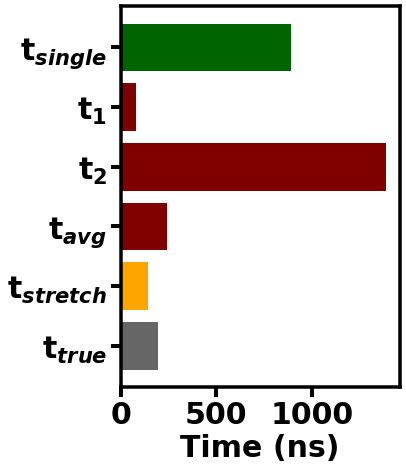

In [62]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure(figsize=(5,7))
#plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("t$_{true}$", lifetime_skew_avg*1e9, color='black', alpha=0.6)
plt.barh("t$_{stretch}$", stretched_exp_skew[3]*1e9, color = 'orange')
plt.barh("t$_{avg}$", double_exp_skew[4]*1e9, color='maroon')
plt.barh("t$_{2}$", double_exp_skew[2]*1e9, color='maroon')
plt.barh("t$_{1}$", double_exp_skew[0]*1e9, color='maroon')
plt.barh("t$_{single}$", single_exp_skew[2]*1e9, color= 'darkgreen')
plt.xlabel("Time (ns)", fontsize =30 , fontweight='bold')
plt.tick_params(direction='out', length=10, width=4)
#plt.xlim(0, 2500)

SRV1=0 theoretical value = 199.03389800758544 cm/s
SRV1=SRV2 theoretical value = 99.25008075325835 cm/s
SRV1=0 from stretched exp fitting = 278.7886900888203 cm/s
SRV1=SRV2 from stretched exp fitting = 138.871314935557 cm/s
SRV1=0 from tau 2 of biexp fitting = 23.76626332569104 cm/s
SRV1=SRV2 from tau 2 of biexp fitting = 11.879317568879197 cm/s
SRV1=0 from tau avg biexp fitting = 161.9089704884631 cm/s
SRV1=SRV2 from tau avg biexp fitting = 80.77779933333606 cm/s
SRV1=0 from tau avg biexp fitting = 39.78657021483046 cm/s
SRV1=SRV2 from tau avg biexp fitting = 19.88259828403936 cm/s


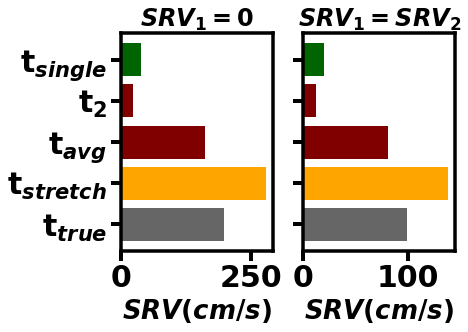

In [63]:
surf_lifetime_avg = calculate_surface_lifetime(lifetime_skew_avg*1e9)
SRV_avg = calculate_srv (surf_lifetime_avg)
print("SRV1=0 theoretical value = " +str(SRV_avg[0]) +' cm/s')
print("SRV1=SRV2 theoretical value = " +str(SRV_avg[1]) +' cm/s' )

surf_lifetime_stretch = calculate_surface_lifetime(stretched_exp_skew[3]*1e9)
SRV_avg_stretch = calculate_srv (surf_lifetime_stretch)
print("SRV1=0 from stretched exp fitting = " +str(SRV_avg_stretch[0]) +' cm/s')
print("SRV1=SRV2 from stretched exp fitting = " +str(SRV_avg_stretch[1]) +' cm/s' )

surf_lifetime_tau_2 = calculate_surface_lifetime(double_exp_skew[2]*1e9)
SRV_avg_tau2 = calculate_srv (surf_lifetime_tau_2)
print("SRV1=0 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[0]) +' cm/s')
print("SRV1=SRV2 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[1]) +' cm/s' )

surf_lifetime_bi = calculate_surface_lifetime(double_exp_skew[4]*1e9)
SRV_avg_bi = calculate_srv (surf_lifetime_bi)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_bi[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_bi[1]) +' cm/s' )

surf_lifetime_mono = calculate_surface_lifetime(single_exp_skew[2]*1e9)
SRV_avg_mono = calculate_srv (surf_lifetime_mono)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_mono[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_mono[1]) +' cm/s' )


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.barh("t$_{true}$", SRV_avg[0], color='black', alpha=0.6)
ax1.barh("t$_{stretch}$", SRV_avg_stretch[0], color='orange')
ax1.barh("t$_{avg}$", SRV_avg_bi[0], color='maroon')
ax1.barh("t$_{2}$", SRV_avg_tau2[0], color='maroon')
ax1.barh("t$_{single}$", SRV_avg_mono[0], color='darkgreen')
ax1.set_title("$SRV_{1} = 0$", fontsize= 24)
ax1.set_xlabel("$SRV (cm/s)$", fontsize= 26)
ax1.tick_params(direction='out', length=10, width=4)

ax2.barh("t$_{true}$",SRV_avg[1], color='black', alpha=0.6)
ax2.barh("t$_{stretch}$", SRV_avg_stretch[1], color='orange')
ax2.barh("t$_{avg}$", SRV_avg_bi[1], color='maroon')
ax2.barh("t$_{2}$",SRV_avg_tau2[1], color='maroon')
ax2.barh("t$_{single}$", SRV_avg_mono[1], color='darkgreen')
ax2.set_title("$SRV_{1} = SRV_{2}$", fontsize= 24)
ax2.set_xlabel("$SRV (cm/s)$", fontsize=26)
ax2.tick_params(direction='out', length=10, width=4)

## Gaussian distribution

In [64]:
import numpy as np

# set the mean and standard deviation
mu, sigma = 8e6, 4e6

# calculate the scaling factor for the Gaussian distribution
scaling_factor = 0.5 / (np.sqrt(2 * np.pi) * sigma)

# set the range of the distribution
lower, upper = 1e3, 1e9

# calculate the probabilities at the lower and upper bounds
p_lower = scaling_factor * np.exp(-0.5 * ((lower - mu) / sigma)**2)
p_upper = scaling_factor * np.exp(-0.5 * ((upper - mu) / sigma)**2)

# calculate the total probability of the distribution in the range
total_p = p_upper - p_lower

# generate 10000 random numbers from a Gaussian distribution
# with the specified mean and standard deviation
gaussian_numbers = []
while len(gaussian_numbers) < 1000:
    x = np.random.normal(mu, sigma)
    if lower <= x <= upper:
        gaussian_numbers.append(x)

# convert the list to a numpy array and sort it
gaussian_numbers = np.array(gaussian_numbers)
gaussian_numbers = np.sort(gaussian_numbers)

# print the first 10 numbers
#print(gaussian_numbers)
gauss = gaussian_numbers
print(gauss.size)

1000


In [65]:
# set the mean and standard deviation
mu, sigma = 8e6, 2e6

# calculate the scaling factor for the Gaussian distribution
scaling_factor = 0.5 / (np.sqrt(2 * np.pi) * sigma)

# set the range of the distribution
lower, upper = 1e3, 1e9

# calculate the probabilities at the lower and upper bounds
p_lower = scaling_factor * np.exp(-0.5 * ((lower - mu) / sigma)**2)
p_upper = scaling_factor * np.exp(-0.5 * ((upper - mu) / sigma)**2)

# calculate the total probability of the distribution in the range
total_p = p_upper - p_lower

# generate 10000 random numbers from a Gaussian distribution
# with the specified mean and standard deviation
gaussian_numbers_2 = []
while len(gaussian_numbers_2) < 1000:
    x = np.random.normal(mu, sigma)
    if lower <= x <= upper:
        gaussian_numbers_2.append(x)

# convert the list to a numpy array and sort it
gaussian_numbers_2 = np.array(gaussian_numbers_2)
gaussian_numbers_2 = np.sort(gaussian_numbers_2)

# print the first 10 numbers
#print(gaussian_numbers)
gauss_2 = gaussian_numbers_2
print(gauss_2.size)

1000


In [66]:
# set the mean and standard deviation
mu, sigma = 8e6, 1e6

# calculate the scaling factor for the Gaussian distribution
scaling_factor = 0.5 / (np.sqrt(2 * np.pi) * sigma)

# set the range of the distribution
lower, upper = 1e3, 1e9

# calculate the probabilities at the lower and upper bounds
p_lower = scaling_factor * np.exp(-0.5 * ((lower - mu) / sigma)**2)
p_upper = scaling_factor * np.exp(-0.5 * ((upper - mu) / sigma)**2)

# calculate the total probability of the distribution in the range
total_p = p_upper - p_lower

# generate 10000 random numbers from a Gaussian distribution
# with the specified mean and standard deviation
gaussian_numbers_3 = []
while len(gaussian_numbers_3) < 1000:
    x = np.random.normal(mu, sigma)
    if lower <= x <= upper:
        gaussian_numbers_3.append(x)

# convert the list to a numpy array and sort it
gaussian_numbers_3 = np.array(gaussian_numbers_3)
gaussian_numbers_3 = np.sort(gaussian_numbers_3)

# print the first 10 numbers
#print(gaussian_numbers)
gauss_3 = gaussian_numbers_3
print(gauss_3.size)

1000


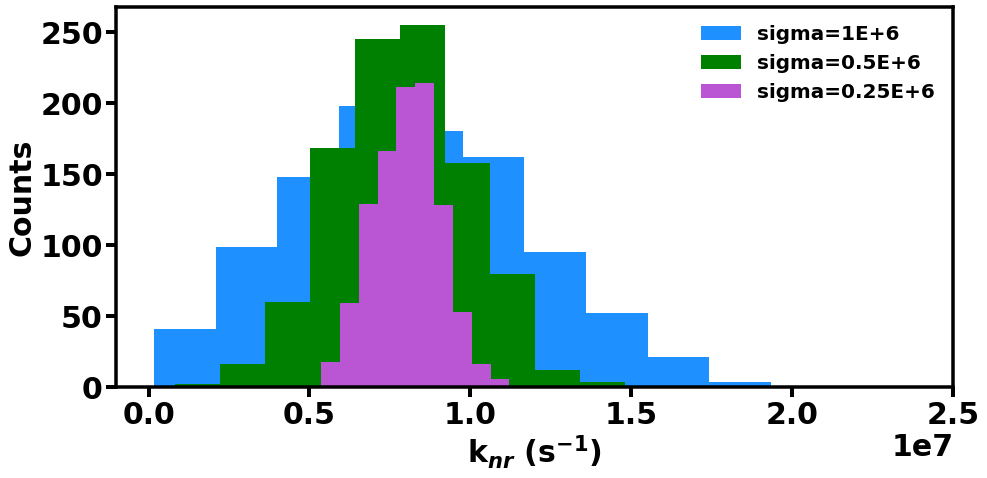

In [67]:
plt.figure(figsize=(15,7))
plt.tick_params(length=8)
plt.hist(gauss, color='dodgerblue', label = "sigma=1E+6")
plt.hist(gauss_2, color='green', label = "sigma=0.5E+6")
plt.hist(gauss_3, color='mediumorchid', label = "sigma=0.25E+6")
plt.xlabel("k$_{nr}$ (s$^{-1}$)", fontsize =30, fontweight ='bold')
#plt.xscale("log")
plt.xlim(-1e6, 2.5e7)
plt.legend(frameon=False, fontsize= 20)
plt.ylabel('Counts', fontsize =30, fontweight ='bold')
plt.ticklabel_format(axis='y', style='plain')
plt.tick_params(direction='out', length=10, width=4)
plt.ticklabel_format(axis='both', style='sci', scilimits=(0,6))

## 1) Simulation of PL decays in LLI and HLI with a *gaussian distribution* of K_nonrad around 10^6 cm-3 

### 1 - gauss 1 (8e6, 4e6)

In [68]:
#creation of LLI PL decay curves and average decay curve
t=np.linspace(0,5000, 10000)*1e-9
# PL decay curves for each k1 value 
pl_gauss = photoluminescence_LLI(k1=gauss, t=np.linspace(0,5000, 10000)*1e-9)
pl_gauss

# weight of each decay curve
gauss_sum = pl_gauss.sum(axis=0)
gauss_sum.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_gauss_avg = np.average(pl_gauss, weights=gauss_sum, axis=-1)
pl_gauss_avg.size

10000

In [69]:
#creation of LLI PL decay curves and average decay curve
t=np.linspace(0,5000, 10000)*1e-9
# PL decay curves for each k1 value 
pl_gauss_HLI = photoluminescence_HLI(k1=gauss, t=np.linspace(0,5000, 10000)*1e-9)
pl_gauss_HLI

# weight of each decay curve
gauss_sum_HLI = pl_gauss_HLI.sum(axis=0)
gauss_sum_HLI.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_gauss_avg_HLI = np.average(pl_gauss_HLI, weights=gauss_sum_HLI, axis=-1)
pl_gauss_avg_HLI.size

10000

### 2- Gauss 2 (8e6, 2e6)

In [70]:
#creation of LLI PL decay curves and average decay curve
t=np.linspace(0,5000, 10000)*1e-9
# PL decay curves for each k1 value 
pl_gauss_2 = photoluminescence_LLI(k1=gauss_2, t=np.linspace(0,5000, 10000)*1e-9)
pl_gauss_2

# weight of each decay curve
gauss_sum_2 = pl_gauss_2.sum(axis=0)
gauss_sum_2.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_gauss_avg_2 = np.average(pl_gauss_2, weights=gauss_sum_2, axis=-1)
pl_gauss_avg_2.size

10000

In [71]:
#creation of LLI PL decay curves and average decay curve
t=np.linspace(0,5000, 10000)*1e-9
# PL decay curves for each k1 value 
pl_gauss_2_HLI = photoluminescence_HLI(k1=gauss_2, t=np.linspace(0,5000, 10000)*1e-9)
pl_gauss_2_HLI

# weight of each decay curve
gauss_sum_2_HLI = pl_gauss_2_HLI.sum(axis=0)
gauss_sum_2_HLI.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_gauss_avg_2_HLI = np.average(pl_gauss_2_HLI, weights=gauss_sum_2_HLI, axis=-1)
pl_gauss_avg_2_HLI.size

10000

### 3 - gauss 3 (8e6, 1e6)

In [72]:
#creation of LLI PL decay curves and average decay curve
t=np.linspace(0,5000, 10000)*1e-9
# PL decay curves for each k1 value 
pl_gauss_3 = photoluminescence_LLI(k1=gauss_3, t=np.linspace(0,5000, 10000)*1e-9)
pl_gauss_3

# weight of each decay curve
gauss_sum_3 = pl_gauss_3.sum(axis=0)
gauss_sum_3.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_gauss_avg_3 = np.average(pl_gauss_3, weights=gauss_sum_3, axis=-1)
pl_gauss_avg_3.size

10000

In [73]:
#creation of LLI PL decay curves and average decay curve
t=np.linspace(0,5000, 10000)*1e-9
# PL decay curves for each k1 value 
pl_gauss_3_HLI = photoluminescence_HLI(k1=gauss_3, t=np.linspace(0,5000, 10000)*1e-9)
pl_gauss_3_HLI

# weight of each decay curve
gauss_sum_3_HLI = pl_gauss_3_HLI.sum(axis=0)
gauss_sum_3_HLI.size


# weighted average curve which is most likely the one we end up seeing as overall decay
pl_gauss_avg_3_HLI = np.average(pl_gauss_3_HLI, weights=gauss_sum_3_HLI, axis=-1)
pl_gauss_avg_3_HLI.size

10000

In [74]:
#LLI streched exponential fitting of the average PL exponential decay
stretched_exp = stretch_exp_fit(pl_gauss_avg/np.max(pl_gauss_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

#streched exponential fitting of the average PL exponential decay
stretched_exp_2 = stretch_exp_fit(pl_gauss_avg_2/np.max(pl_gauss_avg_2), t)
print("tau_c (ns) = "+str(stretched_exp_2[0]*1e9))
print("Beta = "+str(stretched_exp_2[1]))
print("avg. tau (ns) = "+str(stretched_exp_2[3]*1e9))

#streched exponential fitting of the average PL exponential decay
stretched_exp_3 = stretch_exp_fit(pl_gauss_avg_3/np.max(pl_gauss_avg_3), t)
print("tau_c (ns) = "+str(stretched_exp_3[0]*1e9))
print("Beta = "+str(stretched_exp_3[1]))
print("avg. tau (ns) = "+str(stretched_exp_3[3]*1e9))

tau_c (ns) = 101.04810761378515
Beta = 0.38033237657218516
avg. tau (ns) = 388.35038736401197
tau_c (ns) = 63.778342663927006
Beta = 0.5467157823050199
avg. tau (ns) = 109.5915615778989
tau_c (ns) = 125.71610374451907
Beta = 0.9698166765427094
avg. tau (ns) = 127.42076902055433


In [75]:
#HLI streched exponential fitting of the average PL exponential decay
stretched_exp_HLI = stretch_exp_fit(pl_gauss_avg_HLI/np.max(pl_gauss_avg_HLI), t)
print("tau_c (ns) = "+str(stretched_exp_HLI[0]*1e9))
print("Beta = "+str(stretched_exp_HLI[1]))
print("avg. tau (ns) = "+str(stretched_exp_HLI[3]*1e9))

#streched exponential fitting of the average PL exponential decay
stretched_exp_2_HLI = stretch_exp_fit(pl_gauss_avg_2_HLI/np.max(pl_gauss_avg_2_HLI), t)
print("tau_c (ns) = "+str(stretched_exp_2_HLI[0]*1e9))
print("Beta = "+str(stretched_exp_2_HLI[1]))
print("avg. tau (ns) = "+str(stretched_exp_2_HLI[3]*1e9))

#streched exponential fitting of the average PL exponential decay
stretched_exp_3_HLI = stretch_exp_fit(pl_gauss_avg_3_HLI/np.max(pl_gauss_avg_3_HLI), t)
print("tau_c (ns) = "+str(stretched_exp_3_HLI[0]*1e9))
print("Beta = "+str(stretched_exp_3_HLI[1]))
print("avg. tau (ns) = "+str(stretched_exp_3_HLI[3]*1e9))

tau_c (ns) = 48.379046231980986
Beta = 0.35597374869773707
avg. tau (ns) = 229.61765541292237
tau_c (ns) = 30.984432842769472
Beta = 0.5366099302326063
avg. tau (ns) = 54.84234809046371
tau_c (ns) = 62.840216812453505
Beta = 0.969730192294256
avg. tau (ns) = 63.69490056374927


(0, 1)

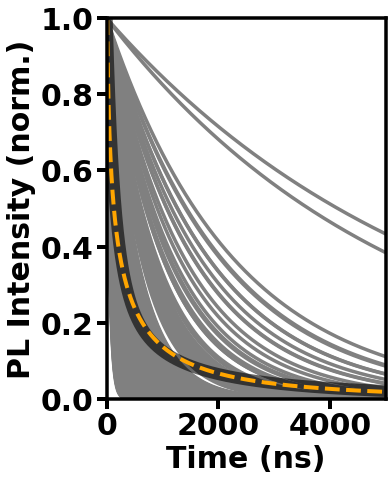

In [76]:
#plot of all exponetial decay for each k1 and average curve
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_gauss/np.max(pl_gauss), color='grey')
plt.plot(t*1e9, pl_gauss_avg/np.max(pl_gauss_avg),'-', color='black', lw=12, alpha=0.6, label="Average curve")
plt.plot(t*1e9, stretched_exp[4], '--',color='orange', lw = 4, label="Stretched exp.")
plt.xlabel('Time (ns)', fontsize= 30, fontweight ='bold' )
plt.ylabel('PL Intensity (norm.)', fontsize= 30, fontweight ='bold')
plt.tick_params(direction='out', length=10, width=4)
#plt.legend(fontsize=18, frameon=False)
plt.xlim(0,5000)
plt.ylim(0,1)
#plt.yscale('log')

(0, 1)

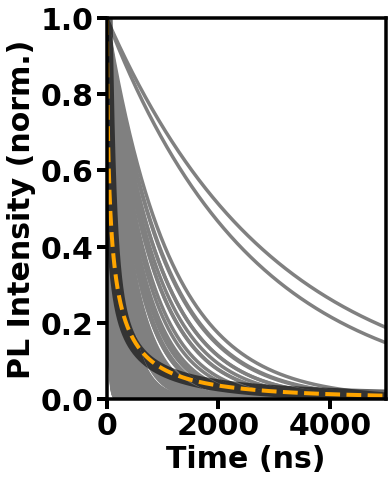

In [77]:
#HLI plot of all exponetial decay for each k1 and average curve
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_gauss_HLI/np.max(pl_gauss_HLI), color='grey')
plt.plot(t*1e9, pl_gauss_avg_HLI/np.max(pl_gauss_avg_HLI),'-', color='black', lw=12, alpha=0.6, label="Average curve")
plt.plot(t*1e9, stretched_exp_HLI[4], '--',color='orange', lw = 4, label="Stretched exp.")
plt.xlabel('Time (ns)', fontsize= 30, fontweight ='bold' )
plt.ylabel('PL Intensity (norm.)', fontsize= 30, fontweight ='bold')
plt.tick_params(direction='out', length=10, width=4)
#plt.legend(fontsize=18, frameon=False)
plt.xlim(0,5000)
plt.ylim(0,1)
#plt.yscale('log')

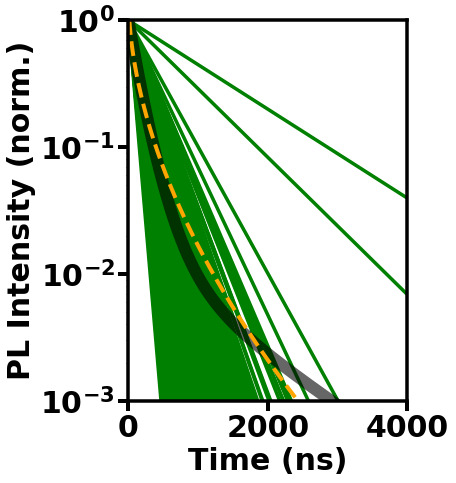

In [78]:
#plot of all exponetial decay for each k1 and average curve
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_gauss_2/np.max(pl_gauss_2), color='green')
plt.plot(t*1e9, pl_gauss_avg_2/np.max(pl_gauss_avg_2),'-', color='black', lw=12, alpha=0.6, label="Average curve")
plt.plot(t*1e9, stretched_exp_2[4], '--',color='orange', lw = 4, label="Stretched exp.")
plt.xlabel('Time (ns)', fontsize= 30, fontweight ='bold' )
plt.ylabel('PL Intensity (norm.)', fontsize= 30, fontweight ='bold')
plt.tick_params(direction='out', length=10, width=4)
#plt.legend(fontsize=18, frameon=False)
plt.xlim(0,4000)
plt.ylim(0.001,1)
plt.yscale('log')

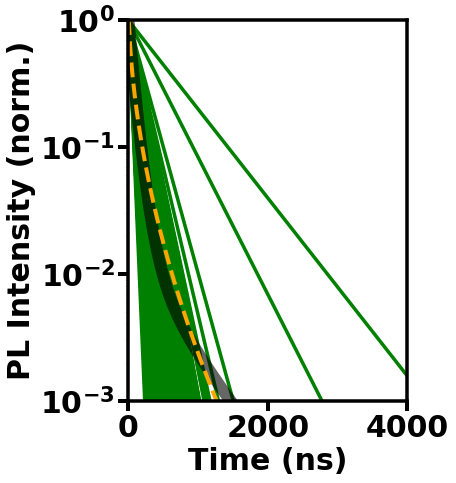

In [79]:
#HLI plot of all exponetial decay for each k1 and average curve
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_gauss_2_HLI/np.max(pl_gauss_2_HLI), color='green')
plt.plot(t*1e9, pl_gauss_avg_2_HLI/np.max(pl_gauss_avg_2_HLI),'-', color='black', lw=12, alpha=0.6, label="Average curve")
plt.plot(t*1e9, stretched_exp_2_HLI[4], '--',color='orange', lw = 4, label="Stretched exp.")
plt.xlabel('Time (ns)', fontsize= 30, fontweight ='bold' )
plt.ylabel('PL Intensity (norm.)', fontsize= 30, fontweight ='bold')
plt.tick_params(direction='out', length=10, width=4)
#plt.legend(fontsize=18, frameon=False)
plt.xlim(0,4000)
plt.ylim(0.001,1)
plt.yscale('log')

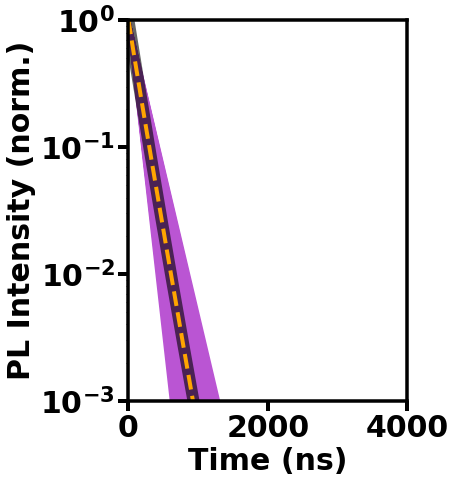

In [80]:
#plot of all exponetial decay for each k1 and average curve
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_gauss_3/np.max(pl_gauss_3), color='mediumorchid')
plt.plot(t*1e9, pl_gauss_avg_3/np.max(pl_gauss_avg_3),'-', color='black', lw=12, alpha=0.6, label="Average curve")
plt.plot(t*1e9, stretched_exp_3[4], '--',color='orange', lw = 4, label="Stretched exp.")
plt.xlabel('Time (ns)', fontsize= 30, fontweight ='bold' )
plt.ylabel('PL Intensity (norm.)', fontsize= 30, fontweight ='bold')
plt.tick_params(direction='out', length=10, width=4)
#plt.legend(fontsize=18, frameon=False)
plt.xlim(0,4000)
plt.ylim(0.001,1)
plt.yscale('log')

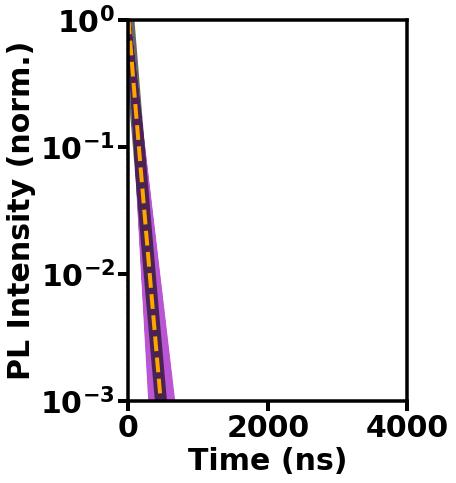

In [81]:
#plot of all exponetial decay for each k1 and average curve
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_gauss_3_HLI/np.max(pl_gauss_3_HLI), color='mediumorchid')
plt.plot(t*1e9, pl_gauss_avg_3_HLI/np.max(pl_gauss_avg_3_HLI),'-', color='black', lw=12, alpha=0.6, label="Average curve")
plt.plot(t*1e9, stretched_exp_3_HLI[4], '--',color='orange', lw = 4, label="Stretched exp.")
plt.xlabel('Time (ns)', fontsize= 30, fontweight ='bold' )
plt.ylabel('PL Intensity (norm.)', fontsize= 30, fontweight ='bold')
plt.tick_params(direction='out', length=10, width=4)
#plt.legend(fontsize=18, frameon=False)
plt.xlim(0,4000)
plt.ylim(0.001,1)
plt.yscale('log')

In [82]:
#double exponential fitting of the average PL exponential decay
double_exp = double_exp_fit(pl_gauss_avg/np.max(pl_gauss_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

#single exponential fitting of the average PL exponential decay
single_exp = single_exp_fit(pl_gauss_avg/np.max(pl_gauss_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))

tau1 (ns) = 231.01790229790478
a1 = 0.7273212202310011
tau2 (ns) = 2169.6682528887504
a2 = 0.17316276342688608
avg. tau (ns) = 603.8197045722167
tau (ns) = 1255.1909841802399
a = 0.44677546852899636
avg. tau (ns) = 1255.1909841802399


In [83]:
#double exponential fitting of the average PL exponential decay
double_exp_HLI = double_exp_fit(pl_gauss_avg_HLI/np.max(pl_gauss_avg_HLI), t)
print("tau1 (ns) = "+str(double_exp_HLI[0]*1e9))
print("a1 = "+str(double_exp_HLI[1]))
print("tau2 (ns) = "+str(double_exp_HLI[2]*1e9))
print("a2 = "+str(double_exp_HLI[3]))
print("avg. tau (ns) = "+str(double_exp_HLI[4]*1e9))

#single exponential fitting of the average PL exponential decay
single_exp_HLI = single_exp_fit(pl_gauss_avg_HLI/np.max(pl_gauss_avg_HLI), t)
print("tau (ns) = "+str(single_exp_HLI[0]*1e9))
print("a = "+str(single_exp_HLI[1]))
print("avg. tau (ns) = "+str(single_exp_HLI[2]*1e9))

tau1 (ns) = 151.23270923813885
a1 = 0.7003993056881697
tau2 (ns) = 1647.5152112115309
a2 = 0.13384041401577063
avg. tau (ns) = 391.2872940518929
tau (ns) = 1021.4894829664181
a = 0.35341622854497595
avg. tau (ns) = 1021.4894829664181


C:\Users\Margherita\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


(0.006416686553163975, 1)

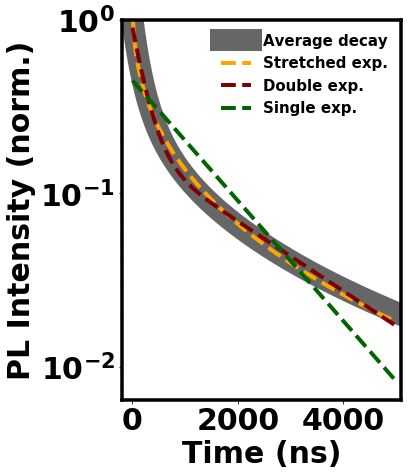

In [84]:
# plot fitting functions of the average PL exponential decay
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_gauss_avg/np.max(pl_gauss_avg),'-', color= 'black', lw=22, alpha=0.6,label="Average decay")
plt.plot(t*1e9, stretched_exp[4], '--',color='orange', lw = 4, label="Stretched exp.")
plt.plot(t*1e9, double_exp[5], '--', color='maroon', lw = 4, label="Double exp.")
#plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp[3], '--', color='darkgreen', lw = 4, label="Single exp.")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30, fontweight ='bold')
plt.ylabel("PL Intensity (norm.)", fontsize=30, fontweight ='bold')
plt.legend(fontsize=15, frameon=False)
plt.xlim(-200, 5100)
plt.ylim(0.0, 1, 0.02)

C:\Users\Margherita\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


(0.0019267405906043963, 1)

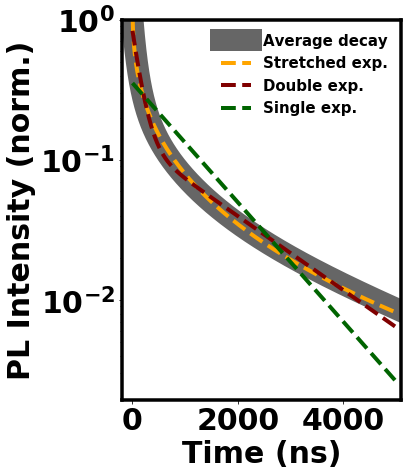

In [85]:
# plot fitting functions of the average PL exponential decay
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_gauss_avg_HLI/np.max(pl_gauss_avg_HLI),'-', color= 'black', lw=22, alpha=0.6,label="Average decay")
plt.plot(t*1e9, stretched_exp_HLI[4], '--',color='orange', lw = 4, label="Stretched exp.")
plt.plot(t*1e9, double_exp_HLI[5], '--', color='maroon', lw = 4, label="Double exp.")
#plt.plot(t*1e9, triple_exp[7], 'c--', lw = 3, label="triple exp fit")
plt.plot(t*1e9, single_exp_HLI[3], '--', color='darkgreen', lw = 4, label="Single exp.")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30, fontweight ='bold')
plt.ylabel("PL Intensity (norm.)", fontsize=30, fontweight ='bold')
plt.legend(fontsize=15, frameon=False)
plt.xlim(-200, 5100)
plt.ylim(0.0, 1, 0.02)

In [86]:
#Mathematical derivation of theoretical average lifetime from weighted average of each time at which I = I0/e

#photoluminescence maximum from LLI regime divided by e
PL_e_LLI = np.max(pl_gauss, axis=0)/np.e
PL_e_LLI.size

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_PL_LLI = np.array([])
for ix, i in enumerate(PL_e_LLI):
    b = find_idx(pl_gauss[:, ix], i)
    time_PL_LLI = np.append(time_PL_LLI, b)
time_PL_LLI

# array of lifetime at which PL=PL0/e at LLI
lifetime_LLI = np.array([])
for i in time_PL_LLI:
    lifetime_LLI = np.append(lifetime_LLI, t[int(i)]) 
lifetime_LLI*1e9

#weighted average of calculate lifetimes with pl_sum weights
avg_lifetime_LLI = np.average(lifetime_LLI, weights=gauss_sum, axis=-1)
avg_lifetime_LLI*1e9

577.1986976201434

In [87]:
#Mathematical derivation of theoretical average lifetime from weighted average of each time at which I = I0/e

#photoluminescence maximum from LLI regime divided by e
PL_e_HLI = np.max(pl_gauss_HLI, axis=0)/np.e
PL_e_HLI.size

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_PL_HLI = np.array([])
for ix, i in enumerate(PL_e_HLI):
    b = find_idx(pl_gauss_HLI[:, ix], i)
    time_PL_HLI = np.append(time_PL_HLI, b)
time_PL_HLI

# array of lifetime at which PL=PL0/e at LLI
lifetime_HLI = np.array([])
for i in time_PL_HLI:
    lifetime_HLI = np.append(lifetime_HLI, t[int(i)]) 
lifetime_HLI*1e9

#weighted average of calculate lifetimes with pl_sum weights
avg_lifetime_HLI = np.average(lifetime_HLI, weights=gauss_sum, axis=-1)
avg_lifetime_HLI*1e9

299.4291498437115

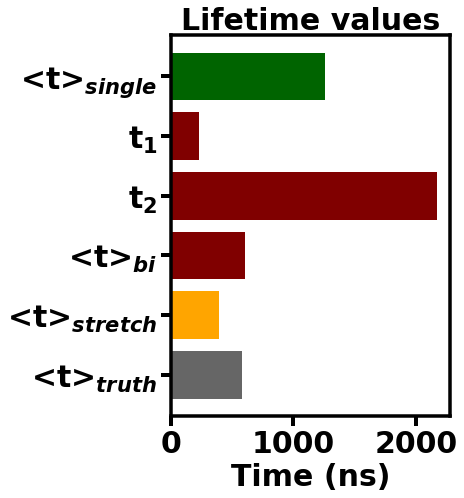

In [88]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure(figsize=(5,7))
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("<t>$_{truth}$", avg_lifetime_LLI*1e9, color='black', alpha =0.6)
plt.barh("<t>$_{stretch}$", stretched_exp[3]*1e9, color = 'orange')
plt.barh("<t>$_{bi}$", double_exp[4]*1e9, color='maroon')
plt.barh("t$_{2}$", double_exp[2]*1e9, color='maroon')
plt.barh("t$_{1}$", double_exp[0]*1e9, color='maroon')
plt.barh("<t>$_{single}$", single_exp[2]*1e9, color= 'darkgreen')
plt.xlabel("Time (ns)", fontsize =30 , fontweight='bold')
plt.tick_params(direction='out', length=10, width=4)
#plt.xlim(0, 1500)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp[6]*1e9)

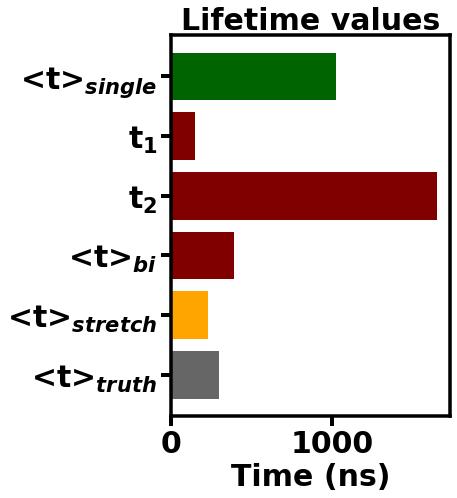

In [89]:
#plot of different tau values, from mathematical calculation (reference) and fitting functions
plt.figure(figsize=(5,7))
plt.title("Lifetime values", fontsize=30, fontweight="bold")
plt.barh("<t>$_{truth}$", avg_lifetime_HLI*1e9, color='black', alpha =0.6)
plt.barh("<t>$_{stretch}$", stretched_exp_HLI[3]*1e9, color = 'orange')
plt.barh("<t>$_{bi}$", double_exp_HLI[4]*1e9, color='maroon')
plt.barh("t$_{2}$", double_exp_HLI[2]*1e9, color='maroon')
plt.barh("t$_{1}$", double_exp_HLI[0]*1e9, color='maroon')
plt.barh("<t>$_{single}$", single_exp_HLI[2]*1e9, color= 'darkgreen')
plt.xlabel("Time (ns)", fontsize =30 , fontweight='bold')
plt.tick_params(direction='out', length=10, width=4)
#plt.xlim(0, 1500)
#plt.barh("Triple Exp $\tau^{3}$", triple_exp[4]*1e9)
#plt.barh("Triple Exp $\tau^{avg}$", triple_exp[6]*1e9)

SRV1=0 theoretical value = 64.37478568830765 cm/s
SRV1=SRV2 theoretical value = 32.159424738020604 cm/s
SRV1=0 from stretched exp fitting = 98.17306714499321 cm/s
SRV1=SRV2 from stretched exp fitting = 49.02151789308213 cm/s
SRV1=0 from tau 1 of biexp fitting = 168.65757936294156 cm/s
SRV1=SRV2 from tau 1 of biexp fitting = 84.13708517750067 cm/s
SRV1=0 from tau 2 of biexp fitting = 13.439250738325962 cm/s
SRV1=SRV2 from tau 2 of biexp fitting = 6.718405592649798 cm/s
SRV1=0 from tau avg biexp fitting = 61.312578887854635 cm/s
SRV1=SRV2 from tau avg biexp fitting = 30.630917801353064 cm/s
SRV1=0 from tau avg biexp fitting = 26.880669495460033 cm/s
SRV1=SRV2 from tau avg biexp fitting = 13.435455740350722 cm/s


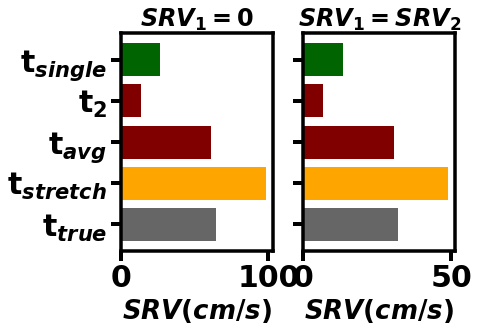

In [90]:
surf_lifetime_avg = calculate_surface_lifetime(avg_lifetime_LLI*1e9)
SRV_avg = calculate_srv (surf_lifetime_avg)
print("SRV1=0 theoretical value = " +str(SRV_avg[0]) +' cm/s')
print("SRV1=SRV2 theoretical value = " +str(SRV_avg[1]) +' cm/s' )

surf_lifetime_stretch = calculate_surface_lifetime(stretched_exp[3]*1e9)
SRV_avg_stretch = calculate_srv (surf_lifetime_stretch)
print("SRV1=0 from stretched exp fitting = " +str(SRV_avg_stretch[0]) +' cm/s')
print("SRV1=SRV2 from stretched exp fitting = " +str(SRV_avg_stretch[1]) +' cm/s' )

surf_lifetime_tau_1 = calculate_surface_lifetime(double_exp[0]*1e9)
SRV_avg_tau1 = calculate_srv (surf_lifetime_tau_1)
print("SRV1=0 from tau 1 of biexp fitting = " +str(SRV_avg_tau1[0]) +' cm/s')
print("SRV1=SRV2 from tau 1 of biexp fitting = " +str(SRV_avg_tau1[1]) +' cm/s' )

surf_lifetime_tau_2 = calculate_surface_lifetime(double_exp[2]*1e9)
SRV_avg_tau2 = calculate_srv (surf_lifetime_tau_2)
print("SRV1=0 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[0]) +' cm/s')
print("SRV1=SRV2 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[1]) +' cm/s' )

surf_lifetime_bi = calculate_surface_lifetime(double_exp[4]*1e9)
SRV_avg_bi = calculate_srv (surf_lifetime_bi)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_bi[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_bi[1]) +' cm/s' )

surf_lifetime_mono = calculate_surface_lifetime(single_exp[2]*1e9)
SRV_avg_mono = calculate_srv (surf_lifetime_mono)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_mono[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_mono[1]) +' cm/s' )


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.barh("t$_{true}$", SRV_avg[0], color='black', alpha=0.6)
ax1.barh("t$_{stretch}$", SRV_avg_stretch[0], color='orange')
ax1.barh("t$_{avg}$", SRV_avg_bi[0],color='maroon')
ax1.barh("t$_{2}$", SRV_avg_tau2[0], color='maroon')
#ax1.barh("t$_{1}$", SRV_avg_tau1[0], color='maroon')
ax1.barh("t$_{single}$", SRV_avg_mono[0], color='darkgreen')
ax1.set_title("$SRV_{1} = 0$", fontsize= 24)
ax1.set_xlabel("$SRV (cm/s)$", fontsize= 26)
ax1.tick_params(direction='out', length=10, width=4)

ax2.barh("t$_{true}$",SRV_avg[1], color='black', alpha=0.6)
ax2.barh("t$_{stretch}$", SRV_avg_stretch[1], color='orange')
ax2.barh("t$_{avg}$", SRV_avg_bi[1], color='maroon')
ax2.barh("t$_{2}$",SRV_avg_tau2[1], color='maroon')
#ax2.barh("t$_{1}$", SRV_avg_tau1[1], color='maroon')
ax2.barh("t$_{single}$", SRV_avg_mono[1], color='darkgreen')
ax2.set_title("$SRV_{1} = SRV_{2}$", fontsize= 24)
ax2.set_xlabel("$SRV (cm/s)$", fontsize=26)
ax2.tick_params(direction='out', length=10, width=4)

In [94]:
#streched exponential fitting of the average PL exponential decay
stretched_exp = stretch_exp_fit(pl_gauss_avg/np.max(pl_gauss_avg), t)
print("tau_c (ns) = "+str(stretched_exp[0]*1e9))
print("Beta = "+str(stretched_exp[1]))
print("avg. tau (ns) = "+str(stretched_exp[3]*1e9))

#double exponential fitting of the average PL exponential decay
double_exp = double_exp_fit(pl_gauss_avg/np.max(pl_gauss_avg), t)
print("tau1 (ns) = "+str(double_exp[0]*1e9))
print("a1 = "+str(double_exp[1]))
print("tau2 (ns) = "+str(double_exp[2]*1e9))
print("a2 = "+str(double_exp[3]))
print("avg. tau (ns) = "+str(double_exp[4]*1e9))

#single exponential fitting of the average PL exponential decay
single_exp = single_exp_fit(pl_gauss_avg/np.max(pl_gauss_avg), t)
print("tau (ns) = "+str(single_exp[0]*1e9))
print("a = "+str(single_exp[1]))
print("avg. tau (ns) = "+str(single_exp[2]*1e9))



tau_c (ns) = 100.9554970822488
Beta = 0.3800973963086057
avg. tau (ns) = 388.71740173997034
tau1 (ns) = 229.20909327335656
a1 = 0.7291034083219343
tau2 (ns) = 2161.882376832545
a2 = 0.17425013852844917
avg. tau (ns) = 602.0073056284115
tau (ns) = 1256.0952376174453
a = 0.4429160753421375
avg. tau (ns) = 1256.0952376174453


(0.03, 1)

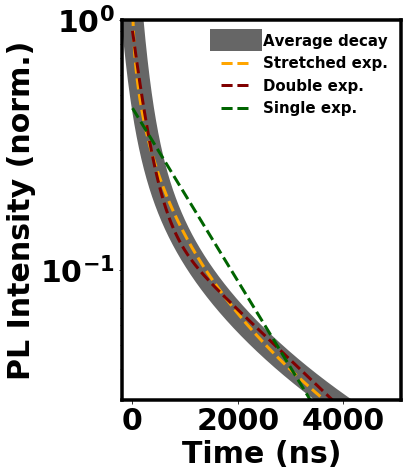

In [95]:
# plot fitting functions of the average PL exponential decay
plt.figure(figsize=(5,7))
plt.plot(t*1e9, pl_gauss_avg/np.max(pl_gauss_avg),'-',color= 'black',lw=22, alpha=0.6,label="Average decay")
plt.plot(t*1e9, stretched_exp[4], '--',color='orange', lw = 3, label="Stretched exp.")
plt.plot(t*1e9, double_exp[5], '--', color='maroon', lw = 3, label="Double exp.")
plt.plot(t*1e9, single_exp[3], '--', color='darkgreen', lw = 3, label="Single exp.")
plt.yscale('log')
plt.xlabel("Time (ns)", fontsize=30, fontweight ='bold')
plt.ylabel("PL Intensity (norm.)", fontsize=30, fontweight ='bold')
plt.legend(fontsize=15, frameon= False)
plt.xlim(-200, 5100)
plt.ylim(0.03, 1)

In [96]:
#Mathematical derivation of theoretical average lifetime from weighted average of each time at which I = I0/e

#photoluminescence maximum from LLI regime divided by e
PL_e_HLI = np.max(pl_gauss, axis=0)/np.e
PL_e_HLI.size

# index of LLI PL data calculated considering each array inside the array of pl singularly
time_PL_HLI = np.array([])
for ix, i in enumerate(PL_e_HLI):
    b = find_idx(pl_gauss[:, ix], i)
    time_PL_HLI = np.append(time_PL_HLI, b)
time_PL_HLI

# array of lifetime at which PL=PL0/e at LLI
lifetime_HLI = np.array([])
for i in time_PL_HLI:
    lifetime_HLI = np.append(lifetime_HLI, t[int(i)]) 
lifetime_HLI*1e9

#weighted average of calculate lifetimes with pl_sum weights
avg_lifetime_HLI = np.average(lifetime_HLI, weights=gauss_sum, axis=-1)
avg_lifetime_HLI*1e9

577.1986976201434

SRV1=0 theoretical value = 64.37478568830765 cm/s
SRV1=SRV2 theoretical value = 32.159424738020604 cm/s
SRV1=0 from stretched exp fitting = 98.07547402582492 cm/s
SRV1=SRV2 from stretched exp fitting = 48.97285044702392 cm/s
SRV1=0 from tau 2 of biexp fitting = 13.505678992806317 cm/s
SRV1=SRV2 from tau 2 of biexp fitting = 6.751607632839448 cm/s
SRV1=0 from tau avg biexp fitting = 61.51245691445023 cm/s
SRV1=SRV2 from tau avg biexp fitting = 30.73069119161574 cm/s
SRV1=0 from tau avg biexp fitting = 26.85770599651693 cm/s
SRV1=SRV2 from tau avg biexp fitting = 13.423982321841585 cm/s


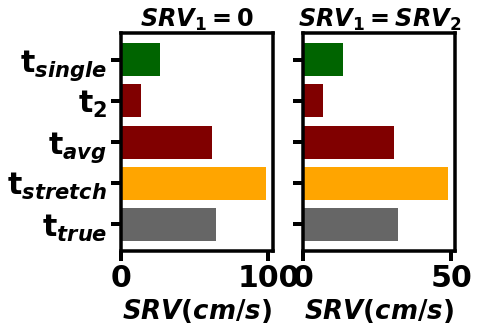

In [97]:
surf_lifetime_avg = calculate_surface_lifetime(avg_lifetime_HLI*1e9)
SRV_avg = calculate_srv (surf_lifetime_avg)
print("SRV1=0 theoretical value = " +str(SRV_avg[0]) +' cm/s')
print("SRV1=SRV2 theoretical value = " +str(SRV_avg[1]) +' cm/s' )

surf_lifetime_stretch = calculate_surface_lifetime(stretched_exp[3]*1e9)
SRV_avg_stretch = calculate_srv (surf_lifetime_stretch)
print("SRV1=0 from stretched exp fitting = " +str(SRV_avg_stretch[0]) +' cm/s')
print("SRV1=SRV2 from stretched exp fitting = " +str(SRV_avg_stretch[1]) +' cm/s' )

surf_lifetime_tau_2 = calculate_surface_lifetime(double_exp[2]*1e9)
SRV_avg_tau2 = calculate_srv (surf_lifetime_tau_2)
print("SRV1=0 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[0]) +' cm/s')
print("SRV1=SRV2 from tau 2 of biexp fitting = " +str(SRV_avg_tau2[1]) +' cm/s' )

surf_lifetime_bi = calculate_surface_lifetime(double_exp[4]*1e9)
SRV_avg_bi = calculate_srv (surf_lifetime_bi)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_bi[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_bi[1]) +' cm/s' )

surf_lifetime_mono = calculate_surface_lifetime(single_exp[2]*1e9)
SRV_avg_mono = calculate_srv (surf_lifetime_mono)
print("SRV1=0 from tau avg biexp fitting = " +str(SRV_avg_mono[0]) +' cm/s')
print("SRV1=SRV2 from tau avg biexp fitting = " +str(SRV_avg_mono[1]) +' cm/s' )


fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.barh("t$_{true}$", SRV_avg[0], color='black', alpha=0.6)
ax1.barh("t$_{stretch}$", SRV_avg_stretch[0], color='orange')
ax1.barh("t$_{avg}$", SRV_avg_bi[0],color='maroon')
ax1.barh("t$_{2}$", SRV_avg_tau2[0], color='maroon')
ax1.barh("t$_{single}$", SRV_avg_mono[0], color='darkgreen')
ax1.set_title("$SRV_{1} = 0$", fontsize= 24)
ax1.set_xlabel("$SRV (cm/s)$", fontsize= 26)
ax1.tick_params(direction='out', length=10, width=4)

ax2.barh("t$_{true}$",SRV_avg[1], color='black', alpha=0.6)
ax2.barh("t$_{stretch}$", SRV_avg_stretch[1], color='orange')
ax2.barh("t$_{avg}$", SRV_avg_bi[1], color='maroon')
ax2.barh("t$_{2}$",SRV_avg_tau2[1], color='maroon')
ax2.barh("t$_{single}$", SRV_avg_mono[1], color='darkgreen')
ax2.set_title("$SRV_{1} = SRV_{2}$", fontsize= 24)
ax2.set_xlabel("$SRV (cm/s)$", fontsize=26)
ax2.tick_params(direction='out', length=10, width=4)